In [76]:
import pandas as pd 
import numpy as np 
import os
import glob 

%matplotlib inline

import datetime as dt

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

import matplotlib.pyplot as plt
import seaborn as sns

schema = pd.read_excel(r'/Users/christophermarshall/Documents/Project - 1/schema/schema.xlsx')

dir = (r'/Users/christophermarshall/Documents/Project - 1/files')

for i in os.listdir(dir):
    files = os.path.join(dir,i)
    split = os.path.splitext(files)
    if split[1]=='.csv':
        os.rename(files,split[0]+'.xlsx')

read_files = glob.glob(os.path.join(dir,'*xlsx'))
np_array_values = []
for files in read_files:
    data = pd.read_csv(files)
    np_array_values.append(data)

merge_values = np.vstack(np_array_values)
data = pd.DataFrame(merge_values)
data.to_excel(r'/Users/christophermarshall/Desktop/data.xlsx', index=False)

data = pd.read_excel(r'/Users/christophermarshall/Desktop/data.xlsx', sheet_name='Sheet1')
data.rename(columns= {0:'TEAM',1:'CONF',2:'G',3:'W',4:'ADJOE',5:'ADJDE',
                                6:'BARTHAG',7:'EFG_O',8:'EFG_D',9:'TOR',10:'TORD',
                                11:'ORB',12:'DRB',13:'FTR',14:'FTRD',15:'2P_O',
                                16:'2P_D',17:'3P_O',18:'3P_D',19:'ADJ_T',
                                20:'WAB',21:'POSTSEASON',22:'SEED',23:'YEAR'}, inplace=True)

#Win / Loss Percents
data['WIN_PCT'] = data['W'] / data['G']
data['LOSS_PCT'] = 1 - data['WIN_PCT']

#ADJOE & ADJDE
# How much this team on average, per 100 possesions, would out or underscore an average division 1 team
data['ADJEM'] = data['ADJOE'] - data['ADJDE'] 

data['SEED'] = data['SEED'].fillna("No Seed")
data['POSTSEASON'] = data['POSTSEASON'].fillna("No Seed")

seedFilter = (data['SEED'] != 'No Seed')
yearFilter = (data['YEAR'] != 2021)

data = data.loc[seedFilter & yearFilter] #College basketball data from 2013-2019, analyzing basic basketball statitics.
data.to_excel(r'/Users/christophermarshall/Desktop/data.xlsx', index=False)
schema # what do these variables represents, data type explanation

,Column Name in Dataset,Explanation/Definition
0,TEAM,The Division I college basketball school
1,CONF,The Athletic Conference in which the school pa...
2,G,Number of games played
3,W,Number of games won
4,ADJOE,Adjusted Offensive Efficiency: This is the amo...
5,ADJDE,Adjusted Defensive Efficiency: This is the amo...
6,BARTHAG,Power Rating (Chance of beating an average Div...
7,EFG_O,Effective Field Goal Percentage Shot
8,EFG_D,Effective Field Goal Percentage Allowed
9,TOR,Turnover Percentage Allowed (Turnover Rate)


In [77]:
data.head(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,WIN_PCT,LOSS_PCT,ADJEM
10,Arizona,P12,34,25,116.1,95.7,0.9022,53.6,46.2,18.2,16.0,35.0,24.9,43.8,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,2016,0.735294,0.264706,20.4
13,Arkansas Little Rock,SB,33,28,107.6,96.7,0.7732,51.9,45.9,15.6,21.0,26.7,29.5,31.5,38.3,48.9,45.7,38.2,30.9,63.8,2.1,R32,12.0,2016,0.848485,0.151515,10.9
18,Austin Peay,OVC,34,16,103.4,109.1,0.3501,51.3,53.8,20.2,18.6,31.9,30.0,47.0,31.3,51.0,53.3,34.7,36.4,70.5,-11.3,R64,16.0,2016,0.470588,0.529412,-5.7
20,Baylor,B12,33,21,119.3,99.2,0.8924,51.6,51.2,18.6,19.8,40.0,28.8,38.6,38.6,49.8,49.1,37.4,36.9,67.4,3.5,R64,5.0,2016,0.636364,0.363636,20.1
32,Buffalo,MAC,34,19,105.1,102.4,0.5746,49.6,49.8,18.8,17.7,31.8,28.7,41.6,37.8,49.0,48.8,33.7,34.3,72.9,-5.8,R64,14.0,2016,0.558824,0.441176,2.7


In [78]:
data.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,YEAR,WIN_PCT,LOSS_PCT,ADJEM
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,34.287815,24.642857,111.505882,96.656092,0.795916,52.100630,47.693697,17.515546,19.037815,31.737605,29.012605,37.134244,33.498529,51.111555,46.597269,35.928992,33.175840,67.601471,1.414076,2016.000000,0.717087,0.282913,14.849790
std,2.209820,4.232030,6.357766,5.405018,0.169903,2.720329,2.431582,1.847733,2.393614,4.211947,2.884610,5.383271,5.878809,2.960088,2.978734,2.538562,2.060032,3.216978,5.006958,2.002104,0.101970,0.101970,9.520782
min,28.000000,12.000000,90.600000,84.000000,0.152200,45.600000,39.600000,12.400000,13.700000,17.700000,21.900000,24.400000,22.100000,43.900000,37.700000,29.600000,27.100000,58.400000,-15.600000,2013.000000,0.363636,0.025641,-15.300000
25%,33.000000,21.000000,107.375000,93.100000,0.739775,50.000000,46.000000,16.300000,17.400000,29.075000,27.100000,33.275000,29.175000,49.100000,44.400000,34.100000,31.775000,65.375000,-1.200000,2014.000000,0.636364,0.212121,9.550000
50%,34.000000,24.000000,111.600000,96.200000,0.856650,51.950000,47.800000,17.400000,18.900000,31.800000,29.200000,36.850000,33.100000,51.000000,46.500000,35.900000,33.200000,67.600000,1.700000,2016.000000,0.718750,0.281250,16.150000
75%,36.000000,27.000000,115.825000,100.100000,0.915175,53.925000,49.325000,18.700000,20.300000,34.700000,31.000000,40.800000,36.800000,52.900000,48.800000,37.800000,34.600000,69.900000,4.500000,2018.000000,0.787879,0.363636,21.450000
max,40.000000,38.000000,129.100000,115.600000,0.984200,59.800000,55.700000,23.700000,28.500000,43.600000,37.300000,55.500000,55.500000,61.400000,56.700000,43.400000,38.700000,77.300000,13.100000,2019.000000,0.974359,0.636364,36.300000


Text(0, 0.5, 'Win Percentage')

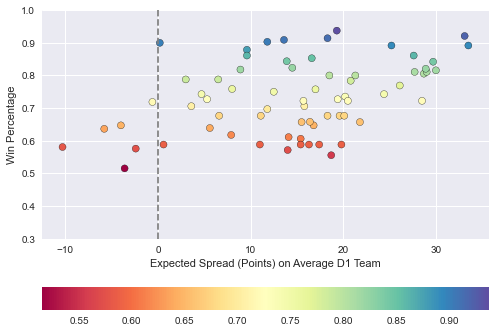

In [79]:
#Relationship Between ADJEM and WIN_PCT
from matplotlib import rcParams
filt2019 = (data['YEAR'] == 2019)
data1 = data.loc[filt2019]
rcParams['figure.figsize'] = 8,6
plt.axvline(0, c=(.5,.5,.5), ls='--')
plt.axhline(0, c=(.5,.5,.5), ls='--')
plt.style.use('seaborn')
plt.scatter(data1.ADJEM, data1.WIN_PCT, c=data1.WIN_PCT, cmap='Spectral',edgecolor='k')
plt.colorbar(orientation='horizontal')
plt.ylim(0.3,1)

plt.xlabel('Expected Spread (Points) on Average D1 Team')
plt.ylabel('Win Percentage')


Text(0, 0.5, 'Win Percentage')

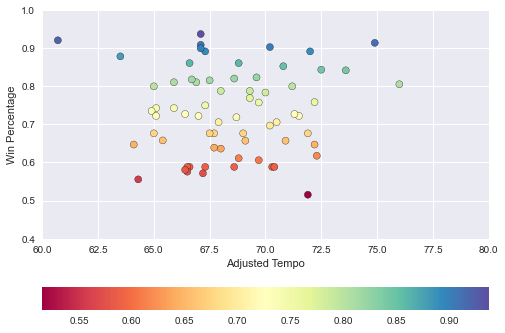

In [80]:
#Relationship between ADJ_T and WIN_PCT
filt2019 = (data['YEAR'] == 2019)
data1 = data.loc[filt2019]
rcParams['figure.figsize'] = 8,6
plt.axvline(0, c=(.5,.5,.5), ls='--')
plt.axhline(0, c=(.5,.5,.5), ls='--')
plt.style.use('seaborn')
plt.scatter(data1.ADJ_T, data1.WIN_PCT, c=data1.WIN_PCT, cmap='Spectral',edgecolor='k')
plt.colorbar(orientation='horizontal')
plt.ylim(.4,1)
plt.xlim(60,80)
plt.xlabel('Adjusted Tempo')
plt.ylabel('Win Percentage')

Text(0.5, 0, 'Turnover Percentage Allowed')

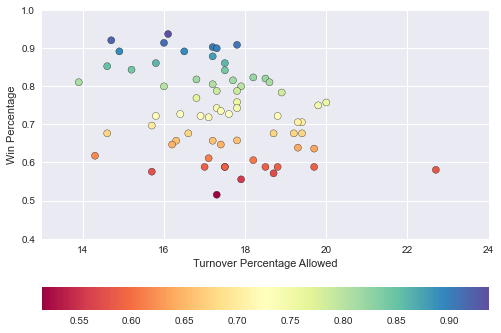

In [81]:
filt2019 = (data['YEAR'] == 2019)
data1 = data.loc[filt2019]
rcParams['figure.figsize'] = 8,6
plt.axvline(0, c=(.5,.5,.5), ls='--')
plt.axhline(0, c=(.5,.5,.5), ls='--')
plt.style.use('seaborn')
plt.scatter(data1.TOR, data1.WIN_PCT, c=data1.WIN_PCT, cmap='Spectral',edgecolor='k')
plt.colorbar(orientation='horizontal')
plt.xlim(13,24)
plt.ylim(.4,1)

plt.ylabel('Win Percentage')
plt.xlabel('Turnover Percentage Allowed')